I analysed this dataset using Python to uncover
patterns and insights around customer ratings and review sentiments. The goal was to identify
key factors that influence good or bad laptop reviews, with a deeper look into one salient
insight that may help brands better understand user satisfaction.

In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:
df = pd.read_csv('laptops_dataset_final_600.csv', encoding='utf-8')
df

,product_name,overall_rating,no_ratings,no_reviews,rating,title,review
0,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Perfect product!,"Loved it, it's my first MacBook that I earned ..."
1,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Battery lasted longer than my first relationsh...
2,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Such a great deal.. very happy with the perfor...
3,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,4,Delightful,"Awesome build quality and very good display, b..."
4,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Awesome,When i ordered and came to know about seller r...
...,...,...,...,...,...,...,...
24108,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,5,Perfect product!,MSI Laptop is high performance and the best. c...
24109,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,5,Perfect product!,Excellent performance best laptop.
24110,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,4,"Good product, Lacks features.",Decent battery life. Exceptional build quality...
24111,Lenovo IdeaPad 5 2-in-1 WUXGA IPS AMD Ryzen 7 ...,4.4,7,2,3,Nice,The product does not support facial recognitio...


Dataset Overview

The dataset includes user-generated reviews of laptops sold on Flipkart. Key columns include:
• Product_Name: Laptop model name
• Rating: Customer's given rating
• No_of_Ratings and No_of_Reviews: Popularity indicators
• Review: Customer-written review
• Overall_Rating: Aggregated rating per product
Initially, the dataset had formatting issues in the numeric columns (e.g., commas in numbers)
and missing values in the review text. I cleaned this data by converting rating-related columns
into integers and filling missing reviews with "No Review".

In [3]:
df['cleaned_review'] = (df.review.str.lower()  # Converting the reviews to lower case
               .str.replace(f'[{string.punctuation}]', '', regex=True) # Removing special characters
               .str.replace(r'\s+', ' ', regex=True) # Replace double white
               .str.encode('utf-8') # Converting emojis to unicode characters  
               .str.decode('unicode_escape')
              )

In [4]:
print('Before:',df.review[0])
print('After:',df.cleaned_review[0])

Before: Loved it, it's my first MacBook that I earned from my hardwork 🥺❤️
After: loved it its my first macbook that i earned from my hardwork ð¥ºâ¤ï¸


In [5]:
#basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24113 entries, 0 to 24112
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    24113 non-null  object 
 1   overall_rating  24113 non-null  float64
 2   no_ratings      24113 non-null  object 
 3   no_reviews      24113 non-null  object 
 4   rating          24113 non-null  int64  
 5   title           24113 non-null  object 
 6   review          24113 non-null  object 
 7   cleaned_review  24113 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.5+ MB


In [6]:
df.describe()

,overall_rating,rating
count,24113.000000,24113.000000
mean,4.186273,4.214573
std,0.228392,1.184845
min,3.300000,1.000000
25%,4.100000,4.000000
50%,4.200000,5.000000
75%,4.300000,5.000000
max,5.000000,5.000000


In [7]:
print (df.shape)

(24113, 8)


In [8]:
print (df.columns)

Index(['product_name', 'overall_rating', 'no_ratings', 'no_reviews', 'rating',
       'title', 'review', 'cleaned_review'],
      dtype='object')


In [9]:
print (df.head())

                                        product_name  overall_rating  \
0  Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...             4.7   
1  Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...             4.7   
2  Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...             4.7   
3  Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...             4.7   
4  Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...             4.7   

  no_ratings no_reviews  rating             title  \
0     15,210        900       5  Perfect product!   
1     15,210        900       5         Fabulous!   
2     15,210        900       5         Fabulous!   
3     15,210        900       4        Delightful   
4     15,210        900       5           Awesome   

                                              review  \
0  Loved it, it's my first MacBook that I earned ...   
1  Battery lasted longer than my first relationsh...   
2  Such a great deal.. very happy with the perfor...   
3  Awesome build quality

In [10]:
print(df.isnull().sum())

product_name      0
overall_rating    0
no_ratings        0
no_reviews        0
rating            0
title             0
review            0
cleaned_review    0
dtype: int64


Data Cleaning and Preprocessing
To ensure a smooth analysis:
• Ratings and reviews were converted to integers.
• Missing reviews were replaced with "No Review".
• Rows with remaining NaNs were dropped.
This created a clean base for statistical and textual exploration.

In [11]:
# Fill or drop missing data
df['review'] = df['review'].fillna('no review')
df.dropna(inplace=True)
df

,product_name,overall_rating,no_ratings,no_reviews,rating,title,review,cleaned_review
0,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Perfect product!,"Loved it, it's my first MacBook that I earned ...",loved it its my first macbook that i earned fr...
1,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Battery lasted longer than my first relationsh...,battery lasted longer than my first relationsh...
2,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Such a great deal.. very happy with the perfor...,such a great deal very happy with the performa...
3,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,4,Delightful,"Awesome build quality and very good display, b...",awesome build quality and very good display ba...
4,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Awesome,When i ordered and came to know about seller r...,when i ordered and came to know about seller r...
...,...,...,...,...,...,...,...,...
24108,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,5,Perfect product!,MSI Laptop is high performance and the best. c...,msi laptop is high performance and the best co...
24109,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,5,Perfect product!,Excellent performance best laptop.,excellent performance best laptop
24110,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,4,"Good product, Lacks features.",Decent battery life. Exceptional build quality...,decent battery life exceptional build quality ...
24111,Lenovo IdeaPad 5 2-in-1 WUXGA IPS AMD Ryzen 7 ...,4.4,7,2,3,Nice,The product does not support facial recognitio...,the product does not support facial recognitio...


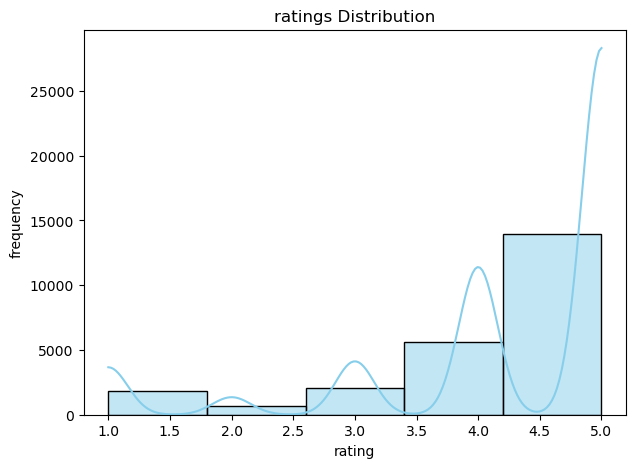

In [12]:
# Ratings distribution plot
plt.figure(figsize=(7,5))
sns.histplot(df['rating'], bins=5, kde=True, color='skyblue')
plt.title('ratings Distribution')
plt.xlabel('rating')
plt.ylabel('frequency')
plt.show()



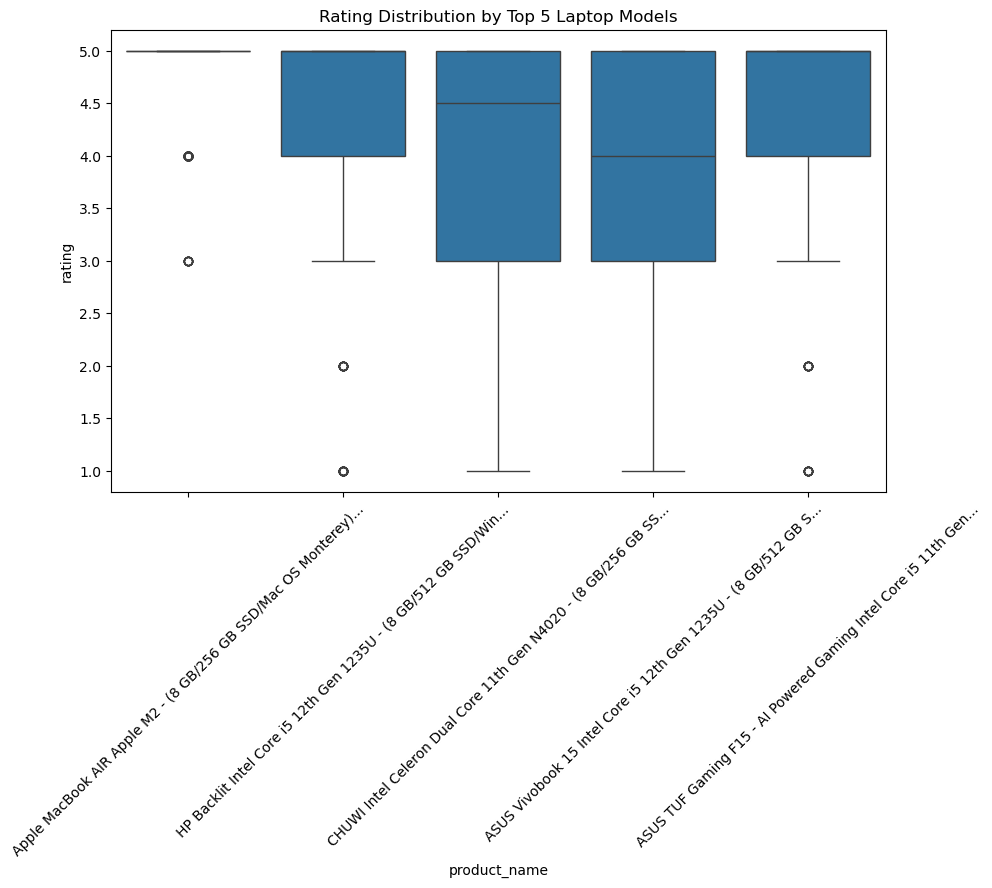

In [13]:
# Boxplot of ratings by laptop model (top 5 models)
top5_models = df['product_name'].value_counts().head(5).index
plt.figure(figsize=(10,6))
sns.boxplot(x='product_name', y='rating', data=df[df['product_name'].isin(top5_models)])
plt.title('Rating Distribution by Top 5 Laptop Models')
plt.xticks(rotation=45)
plt.show()


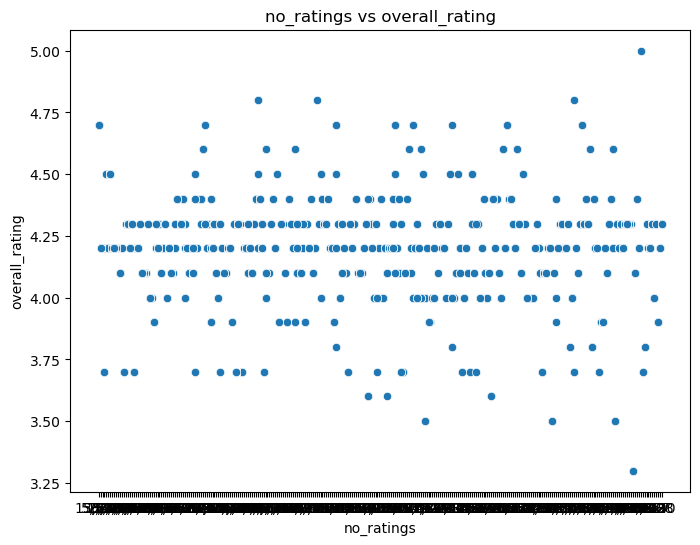

In [14]:
# Scatter plot: number of ratings vs. overall rating
plt.figure(figsize=(8,6))
sns.scatterplot(x='no_ratings', y='overall_rating', data=df)
plt.title('no_ratings vs overall_rating')
plt.show()



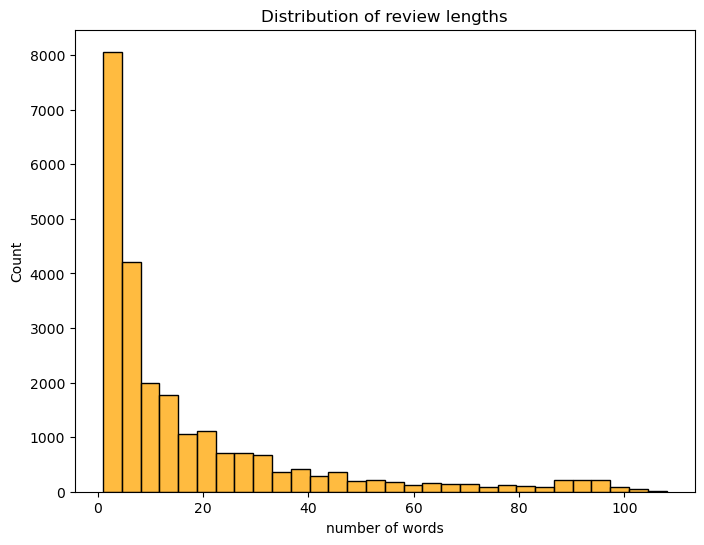

In [15]:
# Analyze review length
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,6))
sns.histplot(df['review_length'], bins=30, color='orange')
plt.title('Distribution of review lengths')
plt.xlabel('number of words')
plt.show()


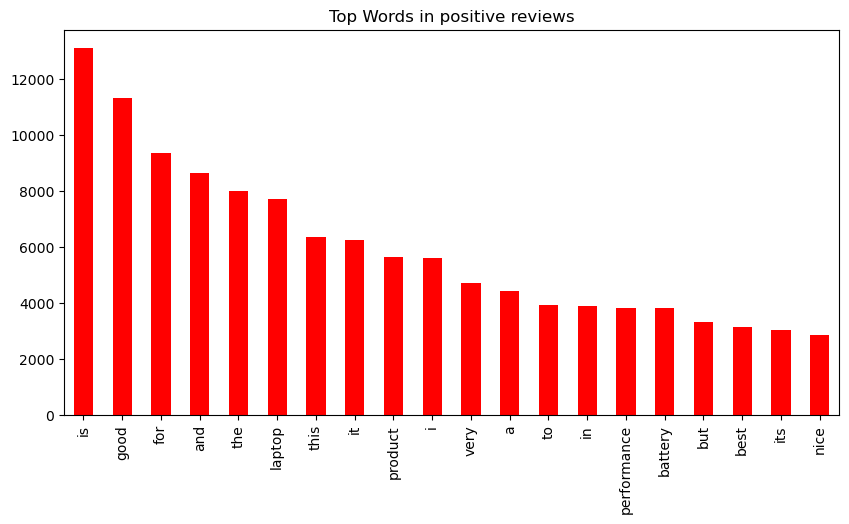

In [16]:
# Top keywords in positive reviews
positive_df = df[df['rating'] >=4]
positive_text = ' '.join(positive_df['review']).lower()
positive_text = re.sub(r'[^a-z\s]', '', positive_text)
positive_words = pd.Series(positive_text.split()).value_counts().head(20)
positive_words.plot(kind='bar', figsize=(10,5), color='red')
plt.title('Top Words in positive reviews')
plt.show()


Learning Outcomes Addressed

• Demonstrated competence in data wrangling and EDA using Python and libraries like
Pandas, Seaborn, and WordCloud.
• Applied critical thinking to identify a meaningful data point (review length vs sentiment).
• Created a shareable and reproducible notebook aligned with professional expectations.
• Engaged in a collaborative, reflective learning process through peer interaction on Canvas

Conclusion
This exploratory analysis highlights how data science can uncover hidden
patterns in consumer feedback. By analysing review length and sentiment, we gained insights
into user behaviour, expectations, and satisfaction drivers. These findings have implications
not just for e-commerce but also for customer experience design.